In [58]:
import tensorflow as tf
import random
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [6]:
import pathlib
train_root = pathlib.Path("/home/putto/Playground/CCPD2019")
print(train_root)

/home/putto/Playground/CCPD2019


In [7]:
all_image_paths = list(train_root.glob('*/*'))
all_image_paths = [str(item) for item in all_image_paths]
print("There are %d images in total." % len(all_image_paths))

There are 355010 images in total.


In [8]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image)
    image = tf.cast(image, tf.float32) / 255.0  # normalize to [0,1] range
    return image

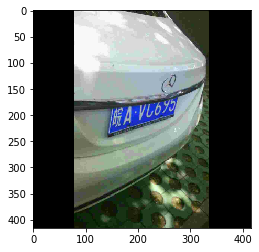

In [99]:
def img_whole(img):
    """
    把图片全装下，不足 416*416 部分补 pad
    """
    return tf.image.resize_with_pad(img, 416, 416)

img = img_whole(load_and_preprocess_image(all_image_paths[2234]))
plt.imshow(img)

(416, 416, 3)


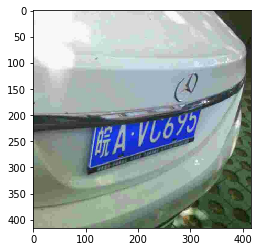

In [100]:
def img_zoom(img, pos=0):
    """
    把图片缩放至没黑边，然后取上中下三部分
    0 代表上面
    1 代表中间
    2 代表下面
    """
    img = tf.image.resize(img, (670, 416), preserve_aspect_ratio=True)
    if pos == 1:
        return img[78:494,:,:]
    elif pos == 2:
        return img[254:,:,:]
    else:
        return img[:416,:,:]

img = img_zoom(load_and_preprocess_image(all_image_paths[2234]), pos=1)
plt.imshow(img)
print(img.shape)

(416, 416, 3)


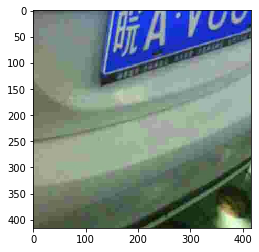

In [104]:
def img_shuffle(img):
    """
    图片不缩放，随机取 416*416 大小的方框
    """
    random_h = random.randint(0, 744)
    random_w = random.randint(0, 304)
    return img[random_h:random_h+416, random_w:random_w+416, :]

img = img_shuffle(load_and_preprocess_image(all_image_paths[2234]))
plt.imshow(img)
print(img.shape)

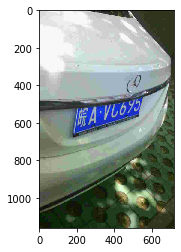

In [61]:
import matplotlib.pyplot as plt

image_path = all_image_paths[2234]
img = load_and_preprocess_image(image_path)
plt.imshow(img)

In [13]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [ ]:
# 得生成图片和标签成对的数据

# 两组 Dataset 合并

dataset_a = tf.data.Dataset.from_tensor_slices([1,2,3])
dataset_b = tf.data.Dataset.from_tensor_slices([4,5,6])

datasetconcat_dataset = dataset_a.concatenate(dataset_b)
iterator = concat_dataset.make_one_shot_iterator()
element = iterator.get_next()
with tf.Session() as sess:
   for i in range(6):
       print(sess.run(element))